#**PROJECT NAME** : **IRIS FLOWER Clasification**

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Our
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
Using the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements

## Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
import missingno
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [ ]:
# Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/CodSoft/Project 2/IRIS.csv")

##Understanding of Data

In [ ]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
print(f'No. of Columns: {df.shape[1]}')
print(f'No. of Rows: {df.shape[0]}')
df.shape

No. of Columns: 5
No. of Rows: 150


(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##Data Cleaning

In [ ]:
# Checking null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* There are no null values in columns

## **Exploratory Data Analysis**

In [ ]:
# Descriptive Analysis
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
# Descriptive Analysis of Object Dtype
df.describe(include = 'O')

species
count           150
unique            3
top     Iris-setosa
freq             50

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['petal_length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [ ]:
df['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [ ]:
df['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [ ]:
df['sepal_width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

Data Visualization

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


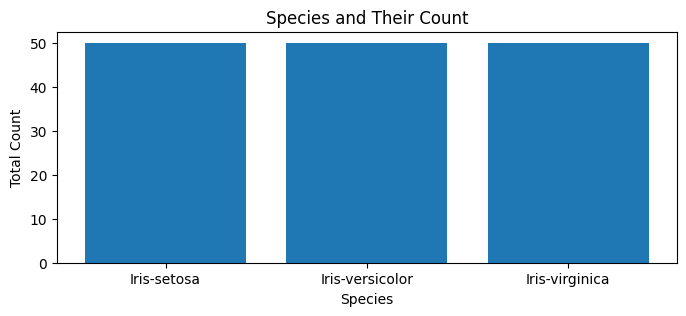

In [ ]:
# Species and their count
species_count = df.species.value_counts()
print(species_count)

# plot
plt.figure(figsize= (8,3))
plt.bar(species_count.index, species_count.values)
plt.title('Species and Their Count')
plt.xlabel('Species')
plt.ylabel('Total Count')
plt.show()

In [ ]:
def Histogram(column):
    global df

    # Create a histogram using plotly.graph_objects
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[column], marker_color='skyblue', marker_line_color='black', marker_line_width=1.5))

    fig.update_layout(title=f'Histogram of {column}',
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      template='plotly_dark')

    fig.show()

In [ ]:
Histogram('sepal_length')

In [ ]:
Histogram('petal_length')

In [ ]:
Histogram('sepal_width')

In [ ]:
Histogram('petal_width')

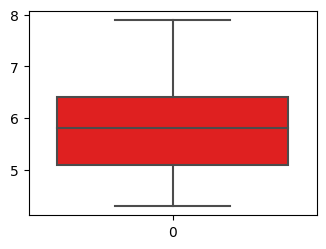

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(df['sepal_length'], color = 'red')
plt.tight_layout()
plt.show()

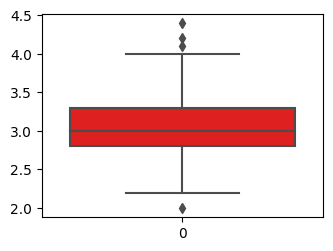

In [ ]:
plt.subplot(2,2,2)
sns.boxplot(df['sepal_width'],color='red')

plt.tight_layout()
plt.show()

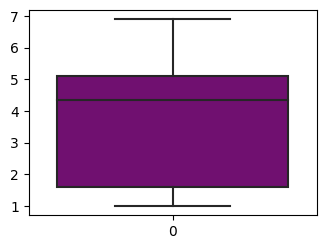

In [ ]:
plt.subplot(2,2,3)
sns.boxplot(df['petal_length'],color='purple')

plt.tight_layout()
plt.show()

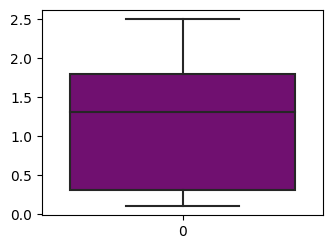

In [ ]:
plt.subplot(2,2,4)
sns.boxplot(df['petal_width'],color='purple')

plt.tight_layout()
plt.show()

In [ ]:
fig1 = px.histogram(df, x= 'species', color= 'sepal_length')
fig1.show()

In [ ]:
fig1 = px.histogram(df, x= 'species', color= 'sepal_width')
fig1.show()

In [ ]:
fig1 = px.histogram(df, x= 'species', color= 'petal_length')
fig1.show()

In [ ]:
fig1 = px.histogram(df, x= 'species', color= 'petal_width')
fig1.show()

In [ ]:
def Scatterplot(x, y, c=None):
    global df

    plt.figure(figsize=(15, 6))
    for species in df['species'].unique():
        plt.scatter(df[x][df['species'] == species], df[y][df['species'] == species], label=species, edgecolor="k", alpha=0.7)
    plt.xticks(rotation=0)

    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

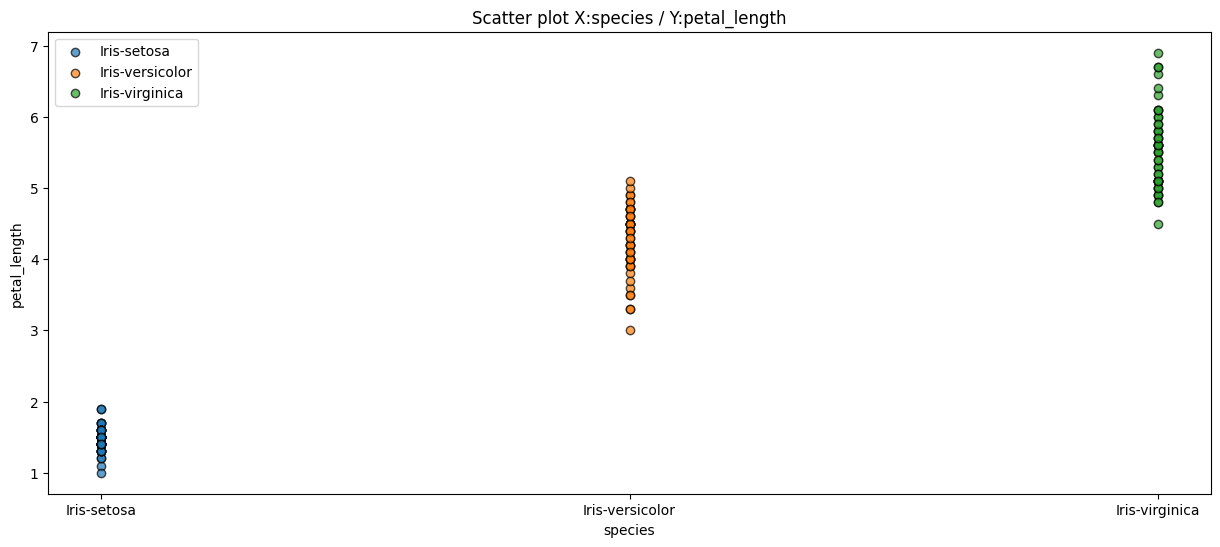

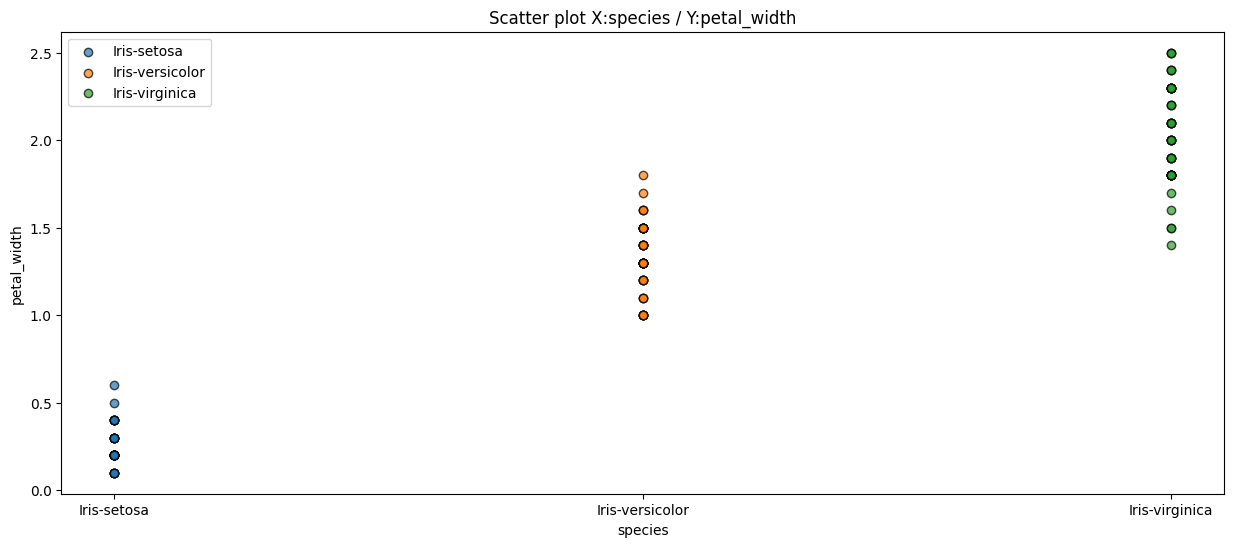

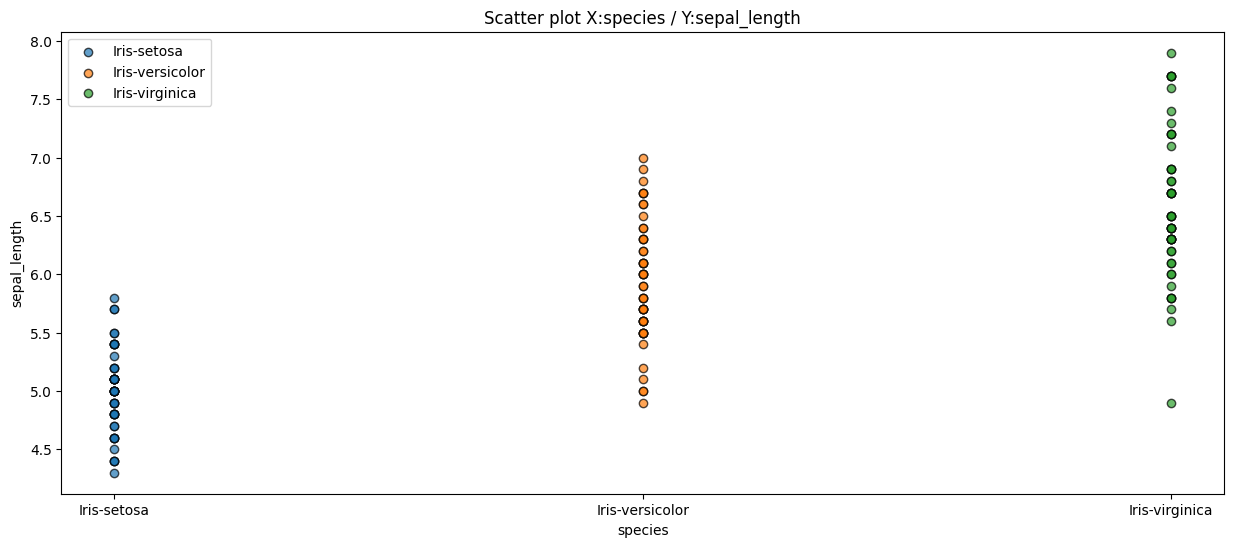

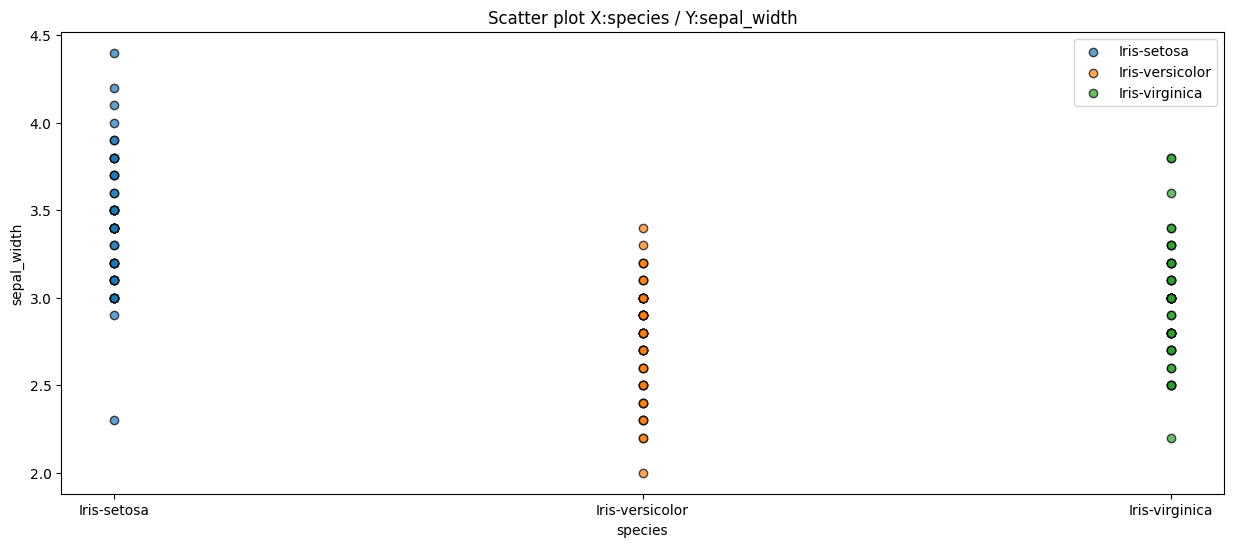

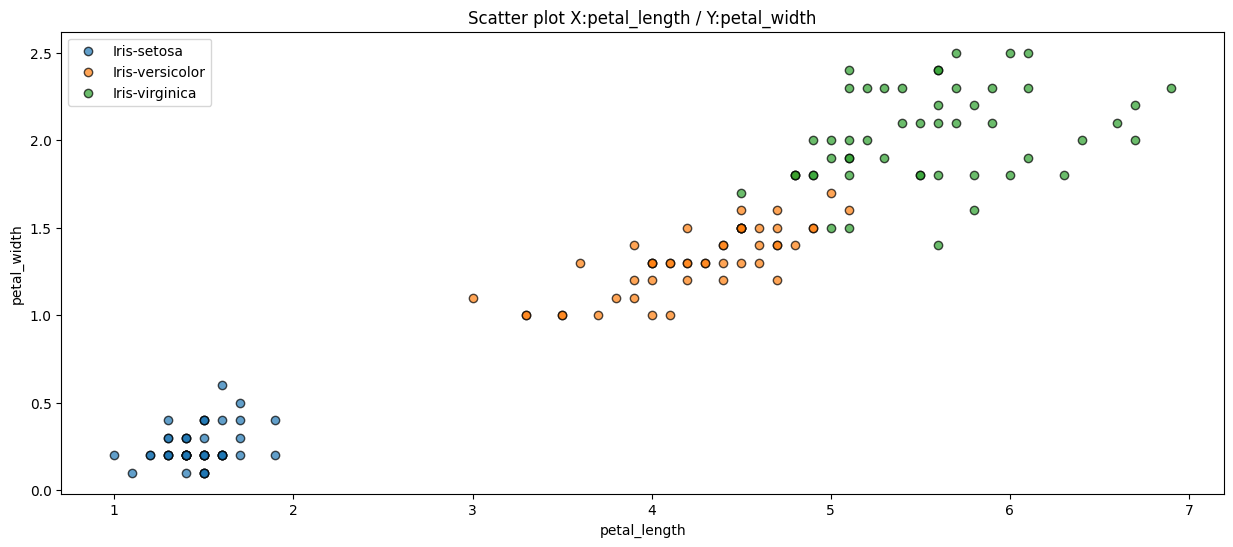

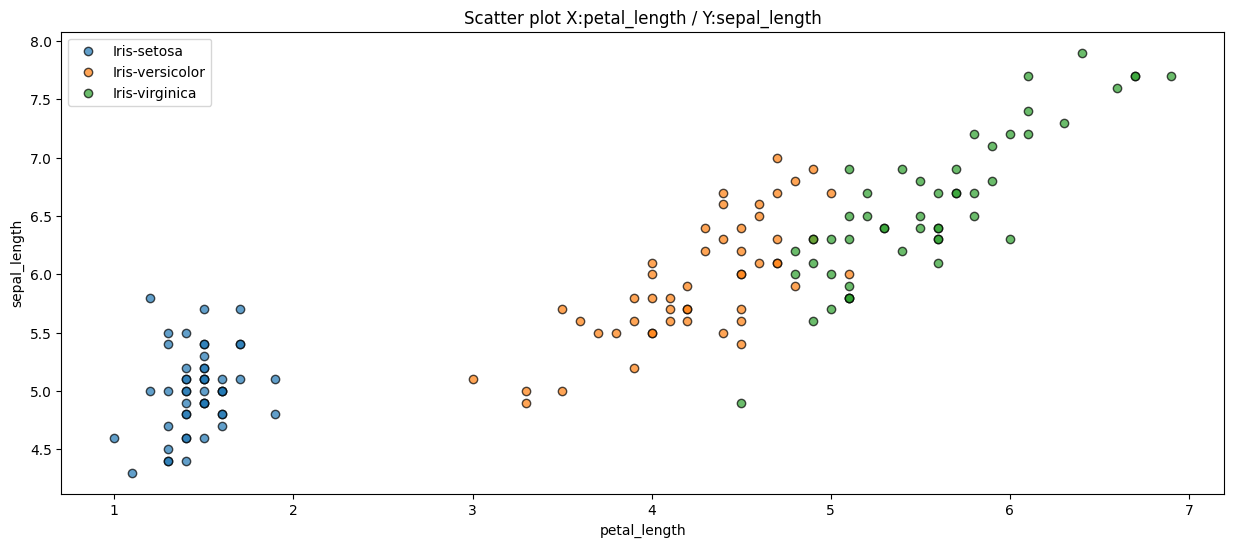

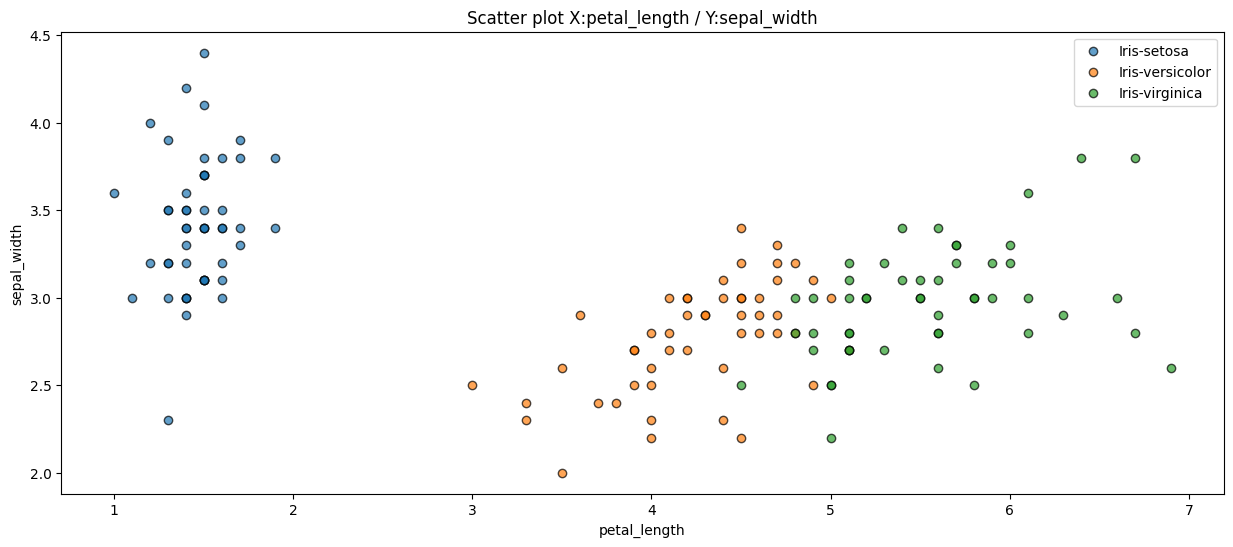

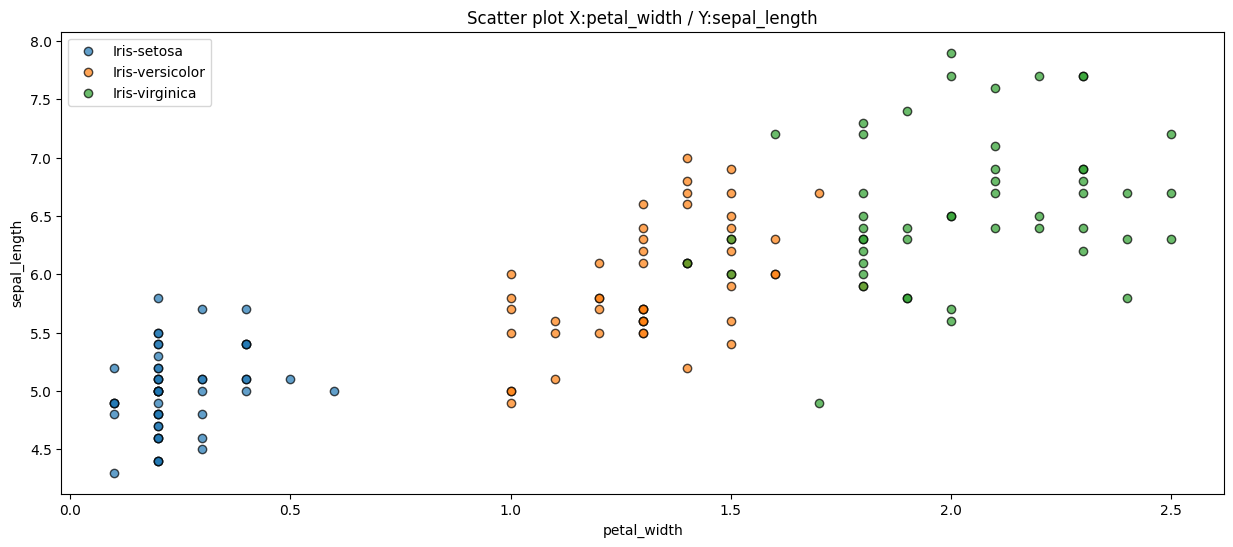

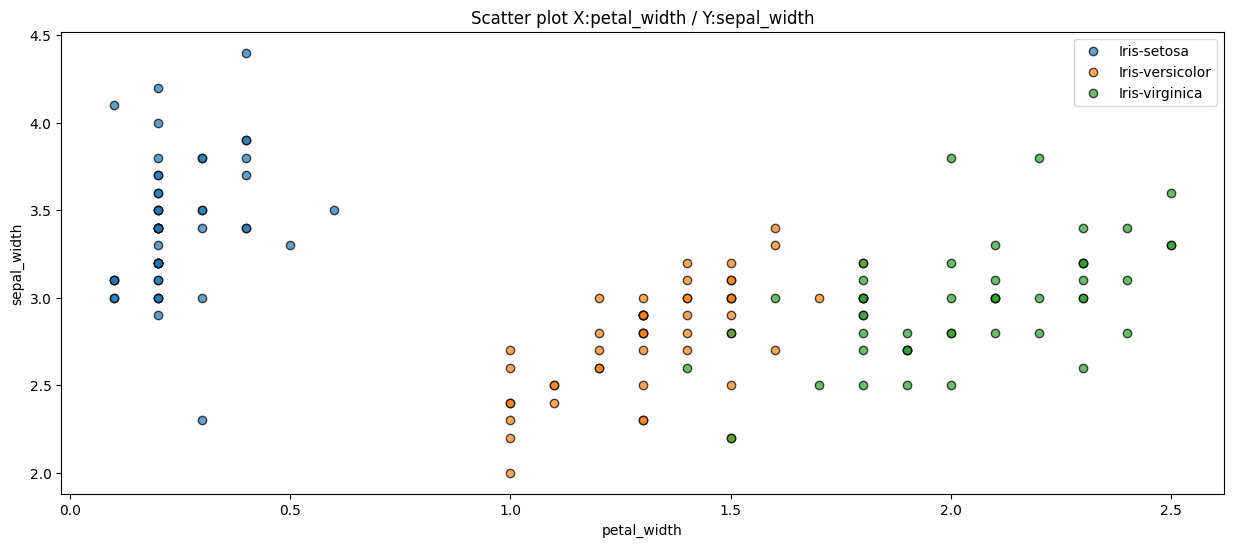

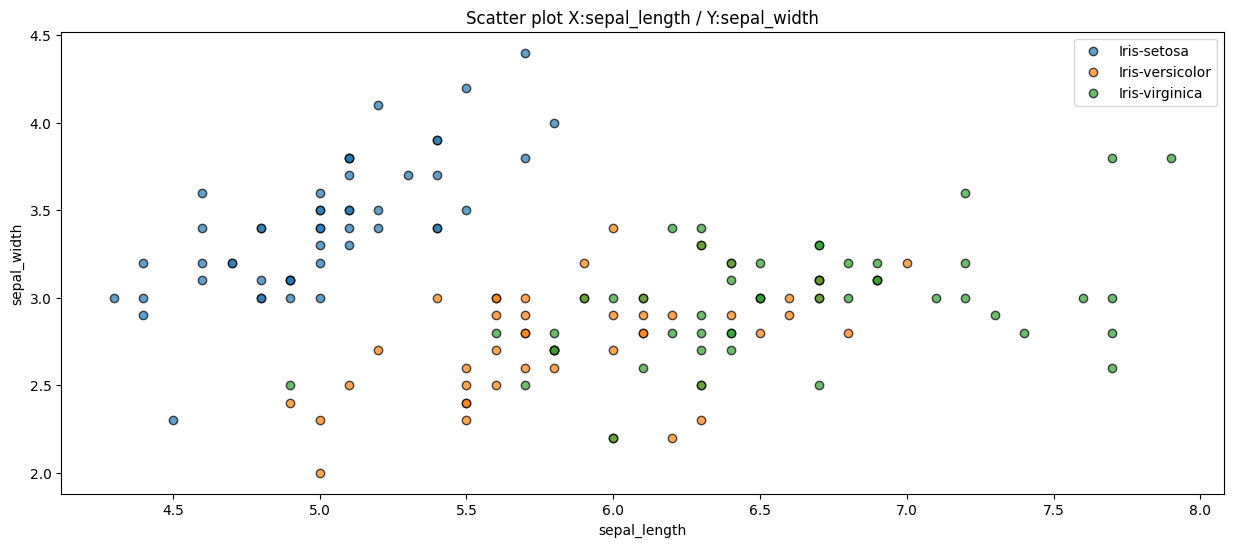

In [ ]:
comb = combinations(["species", "petal_length", "petal_width", "sepal_length", "sepal_width"], 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    Scatterplot(col[0], col[1])

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

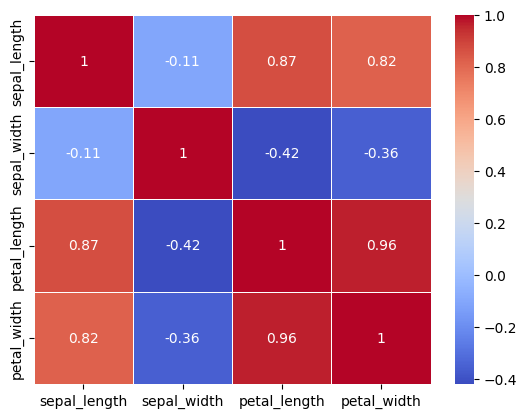

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Correlation Heatmap
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', linewidths= 0.5)

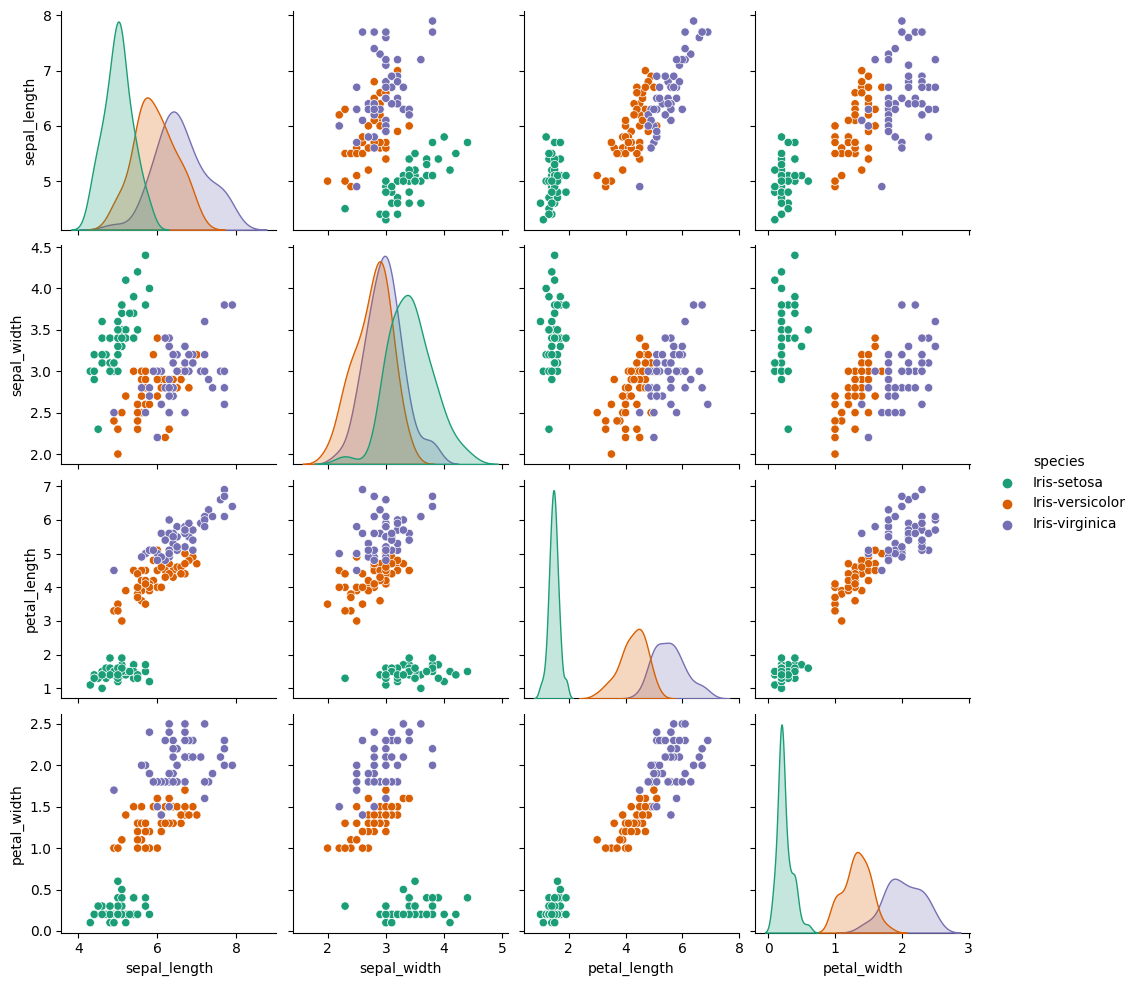

In [ ]:
# Pair plot
sns.pairplot(df, hue= 'species', palette= 'Dark2')

## **Predictive Analysis**

In [ ]:
# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Preprocessing

In [ ]:
# Select features (x) and target variable (y)
indept_variables = list(set(df.columns.tolist()) - {'species'})

x = df[indept_variables]   # df[indept_variables].values
y = df['species']

In [ ]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

Feature Engineering

In [ ]:
# Scaling & standardize the features # transforming
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Building

In [ ]:
# Logistic Regression model
lgr = LogisticRegression()
lgr.fit(x_train, y_train) # Training the data
y_pred = lgr.predict(x_test) # Prdiction for y_test

### Model Evaluation

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 1.00


In [ ]:
# Classification Report
cls_rpt = classification_report(y_test, y_pred)
print(f'Classification Report:\n {cls_rpt}')

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
# Confusion Matrix
cnfsn_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnfsn_mtrx)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Model Testing

In [ ]:
x.head()

petal_length  petal_width  sepal_length  sepal_width
0           1.4          0.2           5.1          3.5
1           1.4          0.2           4.9          3.0
2           1.3          0.2           4.7          3.2
3           1.5          0.2           4.6          3.1
4           1.4          0.2           5.0          3.6

In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [ ]:
# Creating a new DataFrame with values close to 3rd row as per above sample data

data = {'petal_length': [1.2], 'petal_width': [0.19], 'sepal_length': [4.6], 'sepal_width': [3.18]}
testing_df = pd.DataFrame(data)
testing_df

petal_length  petal_width  sepal_length  sepal_width
0           1.2         0.19           4.6         3.18

In [ ]:
# Predict the 'Species'
species_pred = lgr.predict(testing_df)

# Display the 'Species' prediction
print(f'Species is: , {species_pred[0]}')

Species is: , Iris-versicolor
